In [1]:
!pip install plotly
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 60.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread
import tensorflow.keras as keras
import tensorflow as tf

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

### Data Visualization

In [3]:
import pandas as pd
import glob



# Lista de nombres de archivo de imágenes
import os

# Ruta del directorio
path = '/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5'

# Lista para almacenar los nombres de los archivos
breast_imgs = []

# Caminar por el directorio
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.png'):
            breast_imgs.append(os.path.join(root, file))

# Crear listas vacías para almacenar la información
patient_numbers = []
cancer_status = []
x_coords = []
y_coords = []
file_names = []  # Lista para almacenar los nombres de archivo
file_paths = []  # Lista para almacenar las rutas de archivo completas

# Procesar cada nombre de archivo
for img in breast_imgs:
    # Extraer partes del nombre del archivo
    parts = img.split('/')
    filename = parts[-1]  # Obtener el nombre del archivo de la última parte
    patient_number = parts[-3]  # El número del paciente está en la tercer posición desde el final
    
    # Extraer la información de clase y coordenadas del nombre del archivo
    # Ejemplo de nombre de archivo: 10295_idx5_x1351_y1101_class0.png
    info = filename.rstrip('.png').split('_')
    x_coord = int(info[2][1:])
    y_coord = int(info[3][1:])
    status = int(info[4][-1])
    
    # Agregar información a las listas
    patient_numbers.append(patient_number)
    cancer_status.append(status)
    x_coords.append(x_coord)
    y_coords.append(y_coord)
    file_names.append(filename)  # Añadir el nombre del archivo a la lista
    file_paths.append(img)  # Añadir la ruta completa del archivo a la lista

# Crear el DataFrame
df = pd.DataFrame({
    'Patient_Number': patient_numbers,
    'Cancer_Status': cancer_status,
    'X_Coord': x_coords,
    'Y_Coord': y_coords,
    'File_Name': file_names,  # Añadir la columna de nombre de archivo al DataFrame
    'File_Path': file_paths   # Añadir la columna de ruta de archivo al DataFrame
})


# Ordenar el DataFrame
df.sort_values(by=['Patient_Number', 'X_Coord', 'Y_Coord'], inplace=True)

print(df.head())


      Patient_Number  Cancer_Status  X_Coord  Y_Coord  \
54094          10253              0      151     1551   
54220          10253              0      201     1551   
54075          10253              0      301     1651   
54392          10253              0      351     1301   
54237          10253              0      351     1651   

                              File_Name  \
54094  10253_idx5_x151_y1551_class0.png   
54220  10253_idx5_x201_y1551_class0.png   
54075  10253_idx5_x301_y1651_class0.png   
54392  10253_idx5_x351_y1301_class0.png   
54237  10253_idx5_x351_y1651_class0.png   

                                               File_Path  
54094  /kaggle/input/breast-histopathology-images/IDC...  
54220  /kaggle/input/breast-histopathology-images/IDC...  
54075  /kaggle/input/breast-histopathology-images/IDC...  
54392  /kaggle/input/breast-histopathology-images/IDC...  
54237  /kaggle/input/breast-histopathology-images/IDC...  


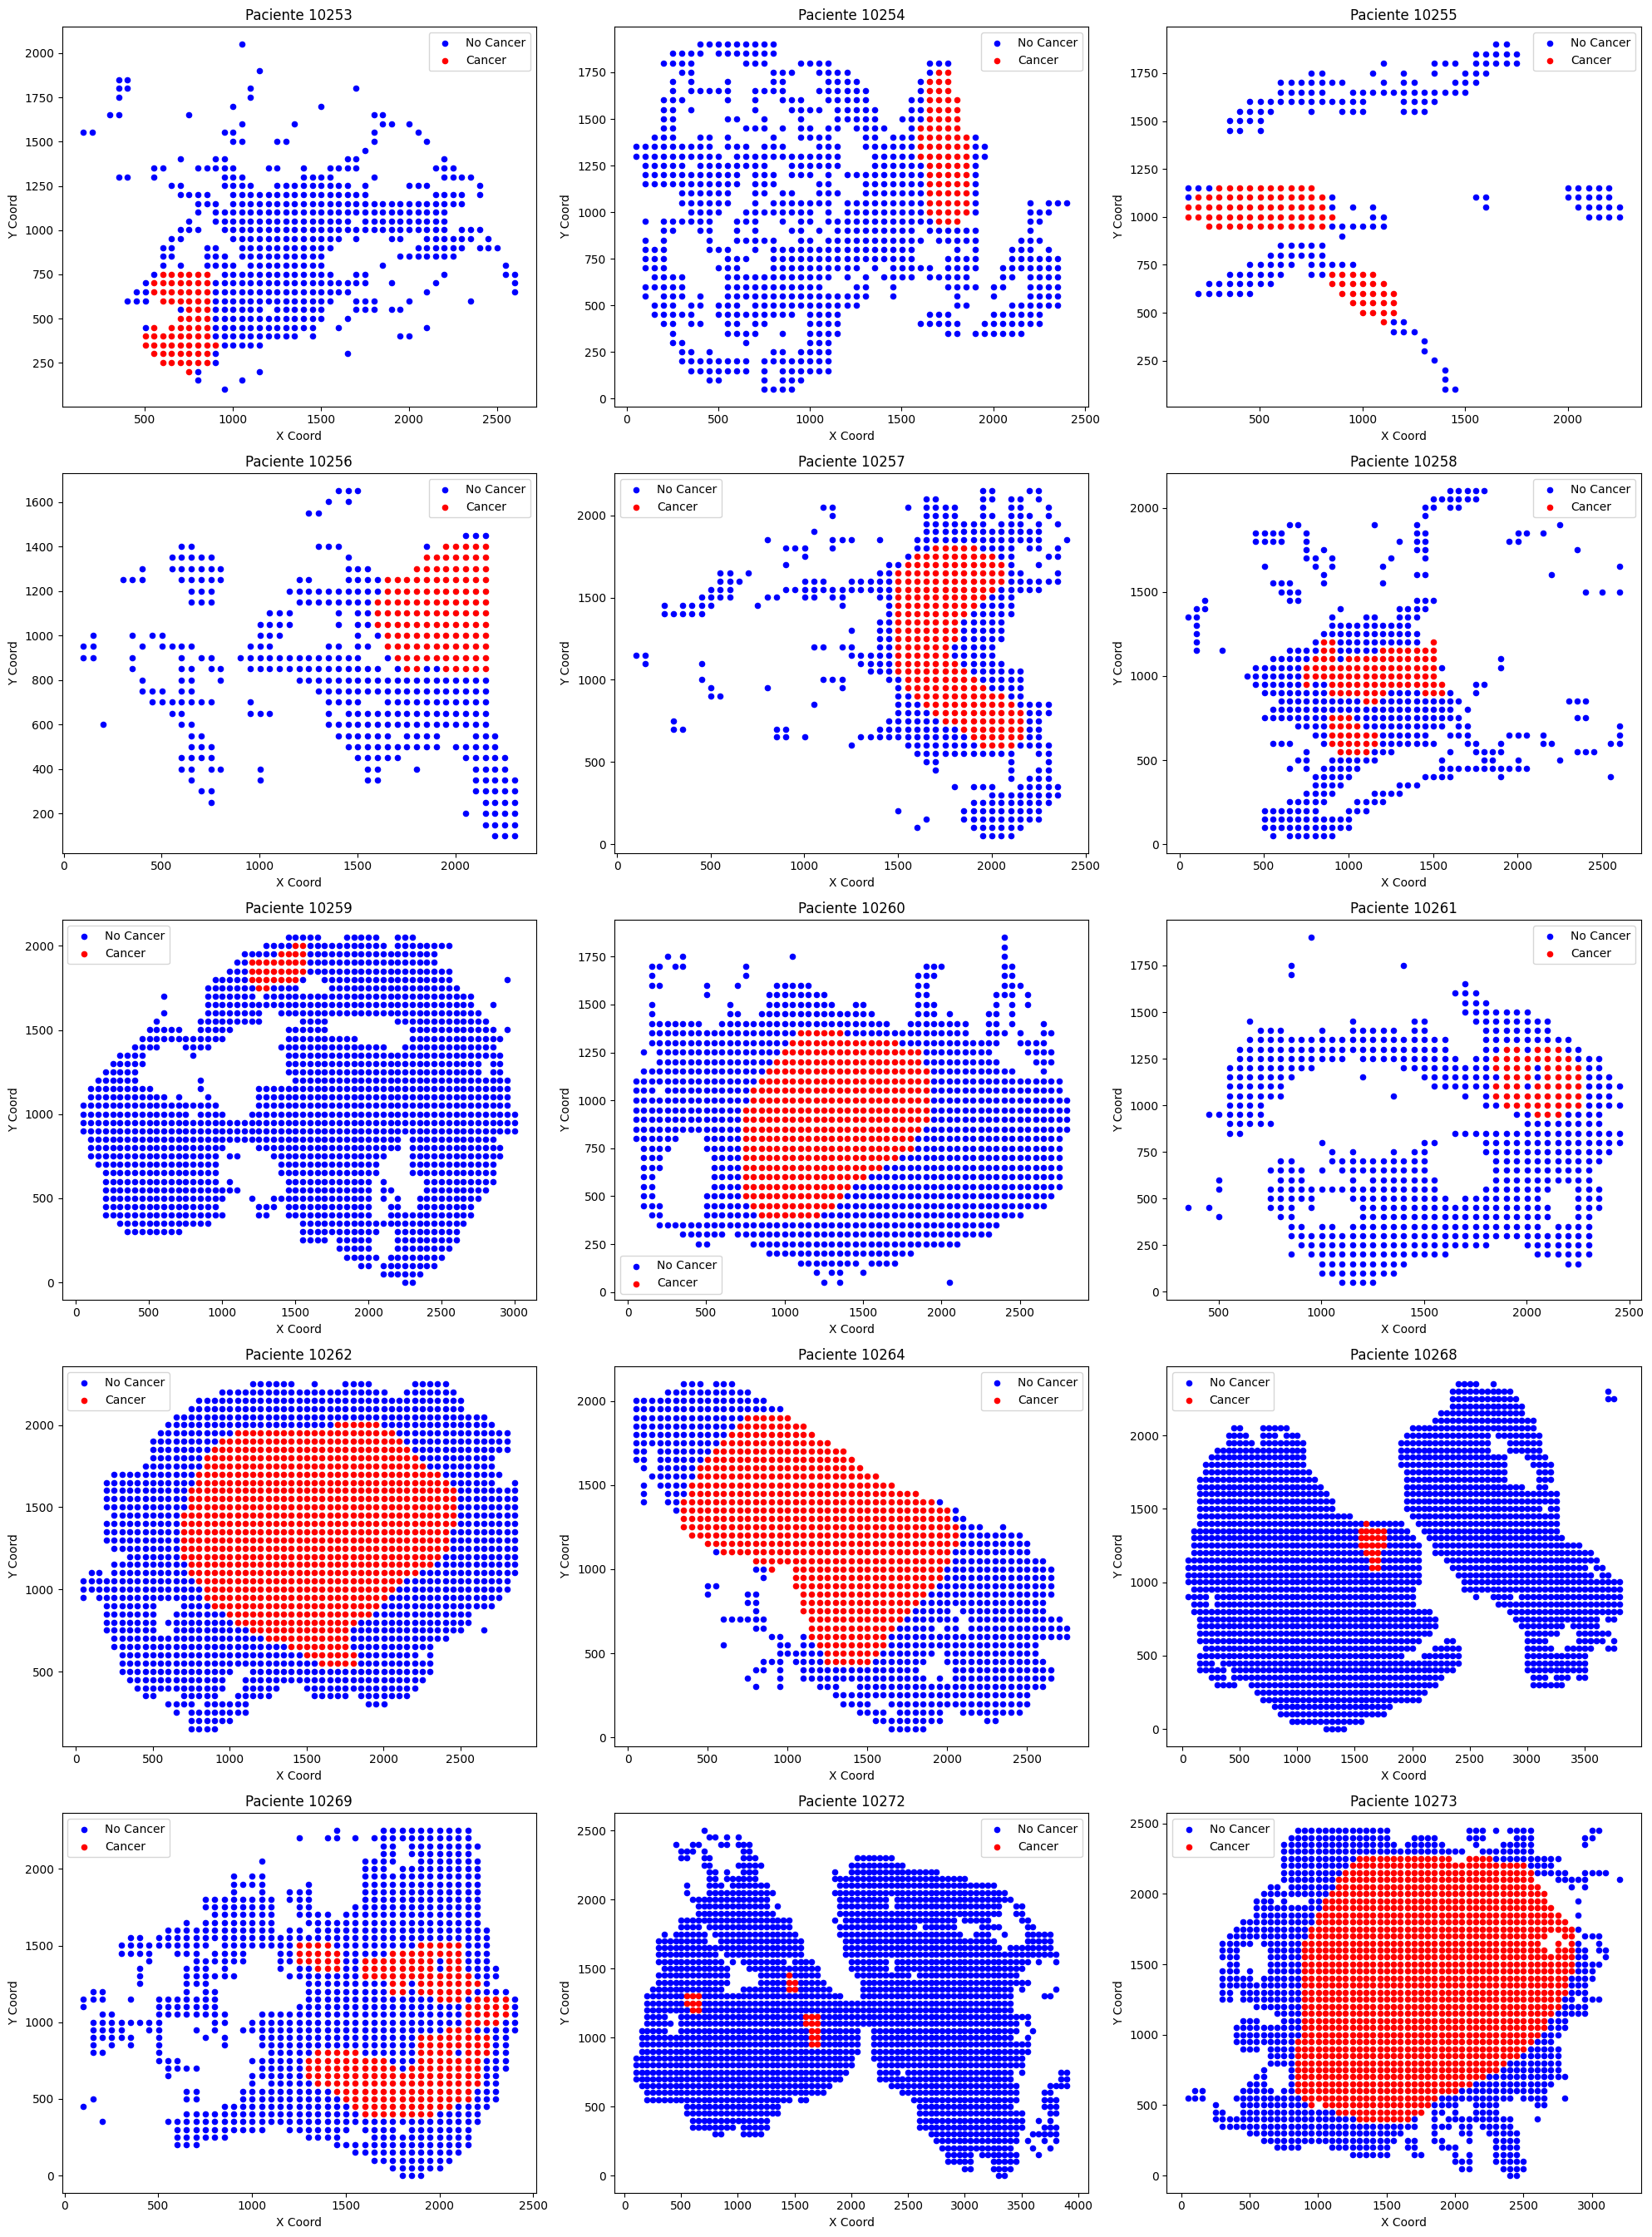

In [4]:
import matplotlib.pyplot as plt

# Obtener los IDs únicos de los pacientes
patient_ids = df['Patient_Number'].unique()

# Configurando la figura para visualizar múltiples subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 27))  # Ajusta el número de subplots según tus necesidades

# Creando un loop para trazar los datos de cada paciente
for i in range(5):  # Ajusta estos rangos según el número de pacientes que desees visualizar
    for j in range(3):
        if 3 * i + j < len(patient_ids):  # Evitar índices fuera del rango
            patient_id = patient_ids[3 * i + j]
            # Filtrar el DataFrame para el paciente específico
            patient_df = df[df['Patient_Number'] == patient_id]
            
            # Graficar las coordenadas
            axs[i, j].scatter(patient_df[patient_df['Cancer_Status'] == 0]['X_Coord'], patient_df[patient_df['Cancer_Status'] == 0]['Y_Coord'], c='blue', label='No Cancer', s=20)
            axs[i, j].scatter(patient_df[patient_df['Cancer_Status'] == 1]['X_Coord'], patient_df[patient_df['Cancer_Status'] == 1]['Y_Coord'], c='red', label='Cancer', s=20)
            
            # Configurando títulos y etiquetas
            axs[i, j].set_title("Paciente " + str(patient_id))
            axs[i, j].set_xlabel("X Coord")
            axs[i, j].set_ylabel("Y Coord")
            axs[i, j].legend()

# Mejorar la distribución de los subplots
plt.tight_layout()
plt.show()


In [5]:
for imgname in breast_imgs[:5]:
    print(imgname)

/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png


In [6]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split




# Assuming df is pre-sorted as required.
df['Full_Path'] = df['File_Path']

# Function to load images and coordinates
def load_image_and_coords_from_path(file_path, label, x_coord, y_coord):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return (image, tf.cast(label, tf.float32), tf.cast(x_coord, tf.float32), tf.cast(y_coord, tf.float32))

# Create a TensorFlow dataset from the DataFrame
def create_dataset(df):
    
    path_ds = tf.data.Dataset.from_tensor_slices((
        df['Full_Path'].values,
        df['Cancer_Status'].values,
        df['X_Coord'].values,
        df['Y_Coord'].values
    ))
    # Use num_parallel_calls=None to ensure that the map operation is deterministic
    dataset = path_ds.map(load_image_and_coords_from_path)
    # Batch the dataset without shuffling
    return dataset.batch(512)

# Function to unpack features and labels
def unpack_features_labels(image, label, x_coord, y_coord):
    return (image, tf.stack([x_coord, y_coord], axis=1)), label

# Split the DataFrame into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['Patient_Number'])
valid_df, test_df = train_test_split(temp_df, test_size=(0.05 / 0.15), random_state=42, stratify=temp_df['Patient_Number'])

# Create and unpack datasets ensuring they are ordered
train_dataset = create_dataset(train_df)
train_dataset = train_dataset.map(unpack_features_labels)

valid_dataset = create_dataset(valid_df)
val_dataset  = valid_dataset.map(unpack_features_labels)

test_dataset = create_dataset(test_df)
test_dataset = test_dataset.map(unpack_features_labels) 



# Print out the coordinates from the first batch to verify order
for (images, coords), labels in train_dataset.take(1):
    x_coords, y_coords = tf.unstack(coords, axis=1)
    for i in range(tf.shape(labels)[0]):
        print(f'Image {i}: Label: {labels[i].numpy()}, X_Coord: {x_coords[i].numpy()}, Y_Coord: {y_coords[i].numpy()}')





2024-04-30 16:24:36.123153: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123259: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123357: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123435: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123501: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123691: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:36.123764: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

Image 0: Label: 0.0, X_Coord: 2001.0, Y_Coord: 1201.0
Image 1: Label: 1.0, X_Coord: 1351.0, Y_Coord: 551.0
Image 2: Label: 1.0, X_Coord: 551.0, Y_Coord: 1251.0
Image 3: Label: 1.0, X_Coord: 1001.0, Y_Coord: 1451.0
Image 4: Label: 0.0, X_Coord: 301.0, Y_Coord: 1751.0
Image 5: Label: 0.0, X_Coord: 1451.0, Y_Coord: 1701.0
Image 6: Label: 0.0, X_Coord: 1001.0, Y_Coord: 551.0
Image 7: Label: 0.0, X_Coord: 1451.0, Y_Coord: 601.0
Image 8: Label: 1.0, X_Coord: 801.0, Y_Coord: 901.0
Image 9: Label: 1.0, X_Coord: 2401.0, Y_Coord: 701.0
Image 10: Label: 0.0, X_Coord: 2651.0, Y_Coord: 401.0
Image 11: Label: 1.0, X_Coord: 551.0, Y_Coord: 1551.0
Image 12: Label: 0.0, X_Coord: 1801.0, Y_Coord: 601.0
Image 13: Label: 0.0, X_Coord: 2301.0, Y_Coord: 851.0
Image 14: Label: 0.0, X_Coord: 251.0, Y_Coord: 1301.0
Image 15: Label: 1.0, X_Coord: 851.0, Y_Coord: 451.0
Image 16: Label: 1.0, X_Coord: 1951.0, Y_Coord: 551.0
Image 17: Label: 0.0, X_Coord: 551.0, Y_Coord: 1001.0
Image 18: Label: 1.0, X_Coord: 551.0,

In [7]:
'''import tensorflow as tf

def augment_image(image, coords):
    
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)


    return image, coords

def prepare_dataset(dataset, shuffle_buffer_size=1000, batch_size=512):
    # Añadir el shuffle, augment, batch y prefetch
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(lambda image, coords, label: (augment_image(image, coords), label),
                          num_parallel_calls=tf.data.AUTOTUNE)  # Utiliza AUTOTUNE para optimizar
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# Aplicar las funciones de data augmentation al dataset de entrenamiento
train_dataset_augmented = prepare_dataset(train_dataset)

# Ahora puedes usar `train_dataset_augmented` para entrenar tu modelo
'''

'import tensorflow as tf\n\ndef augment_image(image, coords):\n    \n    image = tf.image.random_flip_left_right(image)\n    image = tf.image.random_brightness(image, max_delta=0.1)\n    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)\n\n\n    return image, coords\n\ndef prepare_dataset(dataset, shuffle_buffer_size=1000, batch_size=512):\n    # Añadir el shuffle, augment, batch y prefetch\n    dataset = dataset.shuffle(shuffle_buffer_size)\n    dataset = dataset.map(lambda image, coords, label: (augment_image(image, coords), label),\n                          num_parallel_calls=tf.data.AUTOTUNE)  # Utiliza AUTOTUNE para optimizar\n    dataset = dataset.batch(batch_size)\n    dataset = dataset.prefetch(tf.data.AUTOTUNE)\n    return dataset\n\n# Aplicar las funciones de data augmentation al dataset de entrenamiento\ntrain_dataset_augmented = prepare_dataset(train_dataset)\n\n# Ahora puedes usar `train_dataset_augmented` para entrenar tu modelo\n'

Coordenadas y etiquetas de las imágenes en el patch:
(651, 251, 1, 'Original')
(701, 251, 1, 'Original')
(751, 251, 1, 'Original')
(801, 251, 1, 'Original')
(651, 301, 1, 'Original')
(701, 301, 1, 'Original')
(751, 301, 1, 'Original')
(801, 301, 1, 'Original')
(651, 351, 1, 'Original')
(701, 351, 1, 'Original')
(751, 351, 1, 'Original')
(801, 351, 1, 'Original')
(651, 401, 1, 'Original')
(701, 401, 1, 'Original')
(751, 401, 1, 'Original')
(801, 401, 1, 'Original')


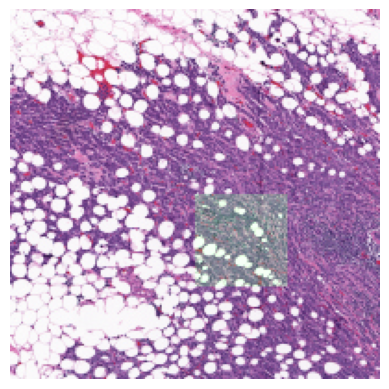

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return image.numpy()

def get_surrounding_images_with_coords(df, center_idx):
    center_x = df.iloc[center_idx]['X_Coord']
    center_y = df.iloc[center_idx]['Y_Coord']
    
    # Definir coordenadas alrededor del centro, asegurándose que la imagen central esté en la posición 11
    patch_coords = [(x, y) for y in range(center_y - 1 * 50, center_y + 3 * 50, 50)
                    for x in range(center_x - 1 * 50, center_x + 3 * 50, 50)]
    
    image_patch = np.zeros((4 * 50, 4 * 50, 3), dtype=np.uint8)
    used_coords_labels = []
    
    for i, (x, y) in enumerate(patch_coords):
        row = i // 4
        col = i % 4
        image_df = df[(df['X_Coord'] == x) & (df['Y_Coord'] == y)]
        
        if image_df.empty:
            nearest_idx = ((df['X_Coord'] - x).abs() + (df['Y_Coord'] - y).abs()).argmin()
            nearest_image_df = df.iloc[nearest_idx]
            image = load_image(nearest_image_df['Full_Path'])
            
            # Aplicar transformaciones de espejo si necesario
            if nearest_image_df['X_Coord'] < center_x:
                image = np.fliplr(image)
            elif nearest_image_df['X_Coord'] > center_x:
                image = np.flipud(image)
            
            used_coords_labels.append((nearest_image_df['X_Coord'], nearest_image_df['Y_Coord'], nearest_image_df['Cancer_Status'], 'Espejo'))
        else:
            image = load_image(image_df.iloc[0]['Full_Path'])
            used_coords_labels.append((x, y, image_df.iloc[0]['Cancer_Status'], 'Original'))
        
        image_patch[row * 50:(row + 1) * 50, col * 50:(col + 1) * 50, :] = image
    
    # Añadir sombreado verde a la imagen central (posición 11, es decir fila 3, columna 3)
    green_mask = np.full((50, 50, 3), [0, 255, 0], dtype=np.uint8)
    image_patch[100:150, 100:150, :] = np.clip(image_patch[100:150, 100:150, :] + green_mask * 0.2, 0, 255)

    return image_patch, used_coords_labels

# Ejemplo de uso:
center_image_idx = 55
patch_image, patch_coords_labels = get_surrounding_images_with_coords(df, center_image_idx)

# Mostrar el patch y las coordenadas de las imágenes utilizadas
print("Coordenadas y etiquetas de las imágenes en el patch:")
for coord_label in patch_coords_labels:
    print(coord_label)

# Verificar el resultado
plt.imshow(patch_image)
plt.axis('off')
plt.show()


In [9]:
rm -rf /kaggle/working/*

In [10]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
'''
def save_image(image_patch, patient_number, label, file_name):
    output_dir = f'/kaggle/working/{patient_number}/{label}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    file_path = os.path.join(output_dir, file_name)
    image_patch = tf.convert_to_tensor(image_patch, dtype=tf.uint8)
    encoded_image = tf.image.encode_png(image_patch)
    tf.io.write_file(file_path, encoded_image)

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return image.numpy()

def create_image_patches(df):
    count=0
    # Agrupa por coordenadas para reducir la carga de búsqueda
    coord_group = df.groupby(['X_Coord', 'Y_Coord'])

    for idx, row in df.iterrows():
        center_x = row['X_Coord']
        center_y = row['Y_Coord']
        image_label = row['Cancer_Status']
        patient_number = row['Patient_Number']
        original_file_name = row['File_Name']

        patch_coords = [(x, y) for y in range(center_y - 1 * 50, center_y + 3 * 50, 50)
                        for x in range(center_x - 1 * 50, center_x + 3 * 50, 50)]
        
        image_patch = np.zeros((4 * 50, 4 * 50, 3), dtype=np.uint8)
        count = count + 1
        if count % 150 == 0:
            print(f"Processed {count} images.")
            break

        for i, (x, y) in enumerate(patch_coords):
            if (x, y) in coord_group.groups:
                image_df = coord_group.get_group((x, y))
                if not image_df.empty:
                    image_path = image_df.iloc[0]['Full_Path']
                    image = load_image(image_path)
                    row = i // 4
                    col = i % 4
                    image_patch[row * 50:(row + 1) * 50, col * 50:(col + 1) * 50, :] = image

        save_image(image_patch, patient_number, str(image_label), original_file_name)

# Asegúrate de que df tiene las columnas correctas
create_image_patches(df)
'''

'\ndef save_image(image_patch, patient_number, label, file_name):\n    output_dir = f\'/kaggle/working/{patient_number}/{label}\'\n    if not os.path.exists(output_dir):\n        os.makedirs(output_dir)\n    \n    file_path = os.path.join(output_dir, file_name)\n    image_patch = tf.convert_to_tensor(image_patch, dtype=tf.uint8)\n    encoded_image = tf.image.encode_png(image_patch)\n    tf.io.write_file(file_path, encoded_image)\n\ndef load_image(file_path):\n    image = tf.io.read_file(file_path)\n    image = tf.image.decode_png(image, channels=3)\n    image = tf.image.resize(image, [50, 50])\n    return image.numpy()\n\ndef create_image_patches(df):\n    count=0\n    # Agrupa por coordenadas para reducir la carga de búsqueda\n    coord_group = df.groupby([\'X_Coord\', \'Y_Coord\'])\n\n    for idx, row in df.iterrows():\n        center_x = row[\'X_Coord\']\n        center_y = row[\'Y_Coord\']\n        image_label = row[\'Cancer_Status\']\n        patient_number = row[\'Patient_Number\

In [11]:

'''
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split



# Crear una copia del DataFrame y ajustar las rutas en la copia
df_copy = df.copy()
df_copy['File_Path'] = df_copy['File_Path'].str.replace(
    "/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5", "/kaggle/working")

# Eliminar las filas cuyas carpetas de pacientes o archivos no existen
df_copy = df_copy[df_copy['File_Path'].apply(lambda x: os.path.exists(os.path.dirname(x)) and os.path.exists(x))]

# Dividir los datos en entrenamiento, validación y prueba
train_df, test_val_df = train_test_split(df_copy, test_size=0.2, stratify=df_copy['Patient_Number'], random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['Patient_Number'], random_state=42)

# Función para cargar y procesar las imágenes


def load_image_and_label(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # El tamaño esperado por VGG16 es 224x224
    label = tf.cast(label, tf.int32)  # Convierte la etiqueta a int32
    return image, label





def create_dataset(dataframe):
    labels = dataframe['Cancer_Status'].values
    file_paths = dataframe['File_Path'].values
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_image_and_label)
    dataset = dataset.batch(128)
    return dataset

# Crear los datasets
train_dataset = create_dataset(train_df)
val_dataset = create_dataset(val_df)
test_dataset = create_dataset(test_df)

# Ahora puedes usar `train_dataset`, `val_dataset` y `test_dataset` para entrenar tu modelo

'''

'\nimport pandas as pd\nimport os\nimport tensorflow as tf\nfrom sklearn.model_selection import train_test_split\n\n\n\n# Crear una copia del DataFrame y ajustar las rutas en la copia\ndf_copy = df.copy()\ndf_copy[\'File_Path\'] = df_copy[\'File_Path\'].str.replace(\n    "/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5", "/kaggle/working")\n\n# Eliminar las filas cuyas carpetas de pacientes o archivos no existen\ndf_copy = df_copy[df_copy[\'File_Path\'].apply(lambda x: os.path.exists(os.path.dirname(x)) and os.path.exists(x))]\n\n# Dividir los datos en entrenamiento, validación y prueba\ntrain_df, test_val_df = train_test_split(df_copy, test_size=0.2, stratify=df_copy[\'Patient_Number\'], random_state=42)\ntest_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df[\'Patient_Number\'], random_state=42)\n\n# Función para cargar y procesar las imágenes\n\n\ndef load_image_and_label(filepath, label):\n    image = tf.io.read_file(filepath)\n    imag

In [12]:
import matplotlib.pyplot as plt
import numpy as np
'''
def display_sample_and_info(dataset, num_samples=2):
    plt.figure(figsize=(10, 2 * num_samples))
    for images, labels in dataset.take(1):
        for i in range(num_samples):
            ax = plt.subplot(num_samples, 1, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {labels[i].numpy()}, "
                      f"Min pixel value: {np.min(images[i].numpy())}, "
                      f"Max pixel value: {np.max(images[i].numpy())}, "
                      f"Data type: {images[i].dtype}, "
                      f"Label type: {labels[i].dtype}, "
                      f"Image size: {images[i].shape}")
            plt.axis("off")
    plt.show()

# Visualizar muestras y detalles del dataset de entrenamiento
print("Muestras y detalles del dataset de entrenamiento:")
display_sample_and_info(train_dataset)

# Visualizar muestras y detalles del dataset de validación
print("Muestras y detalles del dataset de validación:")
display_sample_and_info(val_dataset)

# Visualizar muestras y detalles del dataset de prueba
print("Muestras y detalles del dataset de prueba:")
display_sample_and_info(test_dataset)
'''

'\ndef display_sample_and_info(dataset, num_samples=2):\n    plt.figure(figsize=(10, 2 * num_samples))\n    for images, labels in dataset.take(1):\n        for i in range(num_samples):\n            ax = plt.subplot(num_samples, 1, i + 1)\n            plt.imshow(images[i].numpy().astype("uint8"))\n            plt.title(f"Label: {labels[i].numpy()}, "\n                      f"Min pixel value: {np.min(images[i].numpy())}, "\n                      f"Max pixel value: {np.max(images[i].numpy())}, "\n                      f"Data type: {images[i].dtype}, "\n                      f"Label type: {labels[i].dtype}, "\n                      f"Image size: {images[i].shape}")\n            plt.axis("off")\n    plt.show()\n\n# Visualizar muestras y detalles del dataset de entrenamiento\nprint("Muestras y detalles del dataset de entrenamiento:")\ndisplay_sample_and_info(train_dataset)\n\n# Visualizar muestras y detalles del dataset de validación\nprint("Muestras y detalles del dataset de validación:")\n

In [13]:
USO_TPU = bool(1)
USO_GPU = bool(0)

import tensorflow as tf


if USO_TPU:
    
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    

if USO_GPU: 
    strategy = tf.distribute.MirroredStrategy()
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
    

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [14]:
#INTENTO DE MEJORA 1
import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Add, Resizing, Cropping2D, RandomRotation, RandomBrightness, RandomFlip
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ConvNeXtTiny, NASNetMobile, VGG16, EfficientNetV2M, EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomBrightness, GaussianNoise
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input






with strategy.scope():
    


    # Entrada de imágenes
    image_input = Input(shape=(50, 50, 3), name='image_input')     
    coords_input = Input(shape=(2,), name='coords_input')

    x = RandomBrightness(0.2)(image_input)
    x = RandomFlip()(x)
    x = GaussianNoise(0.2)(x)
    

    # Preprocesamiento específico para EfficientNetV2M
    processed = preprocess_input(x)

    # Carga del modelo base EfficientNetB3
    base_model = EfficientNetB3(include_top=False, weights='imagenet', input_tensor=processed)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = True
        
        
    #trainable_layers = [layer for layer in base_model.layers if len(layer.trainable_weights) > 100]
    
    #if trainable_layers:  
    #    trainable_layers[-1].trainable = True

    #  las salidas del modelo base
    flattened_base_model = Flatten()(base_model.output)

    # Capas densas como parte del top model
    dense1 = Dense(128, activation='relu')(flattened_base_model)
    batch_norm1 = BatchNormalization()(dense1)
    dropout1 = Dropout(0.1)(batch_norm1)  

    dense2 = Dense(64, activation='relu')(dropout1)
    batch_norm2 = BatchNormalization()(dense2)
    dropout2 = Dropout(0.2)(batch_norm2)  

    # Reducir la dimensión para la capa de salida
    dense3 = Dense(32, activation='relu')(dropout2)
    batch_norm3 = BatchNormalization()(dense3)

    # Capa de salida
    output = Dense(1, activation='sigmoid')(batch_norm3)
    
    model = Model(inputs=[image_input,coords_input], outputs=output)
    
    model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy',
    metrics=['accuracy']
    )



2024-04-30 16:24:43.016415: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:24:43.228081: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


43941136/43941136 [==============================] - 0s 0us/step


2024-04-30 16:25:01.701420: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.702046: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.702588: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.703315: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.704049: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.704789: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:25:01.705479: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [15]:
#model.summary()

In [16]:
import tensorflow as tf
import math
import tensorflow
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import LearningRateScheduler


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

# Early stopping to halt the training when validation loss stops improving
early_stopping = EarlyStopping(
    monitor='val_loss',  # Watch the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Reduce learning rate when a metric has stopped improving
plateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,   # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5)   # Number of epochs with no improvement after which learning rate will be reduced.

# Optionally, define a custom learning rate scheduler
from tensorflow.keras.callbacks import Callback

class LRScheduler(Callback):
    def __init__(self, schedule):
        super(LRScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before the epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print(f"Epoch {epoch+1}: Learning rate is {scheduled_lr}.")

# Define your custom scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Instantiate the LRScheduler with your function
lr_scheduler_callback = LRScheduler(lr_scheduler)

# Define class weights if your classes are imbalanced
class_weights = {0: 1.0, 1: 5.0}  # Adjust these based on your specific dataset's class distribution


In [17]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,  # Ajusta el número de épocas según tus necesidades
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stopping, plateau, lr_scheduler_callback])

Epoch 1: Learning rate is 0.0010000000474974513.
Epoch 1/100


2024-04-30 16:26:04.453703: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-04-30 16:26:08.946587: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:08.950010: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:08.950173: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:08.950281: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:08.950457: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:08.950663: E ./tensorflow/compiler/xla/stream_executor/st

  1/461 [..............................] - ETA: 12:23:55 - loss: 2.0016 - accuracy: 0.5137

2024-04-30 16:26:57.975419: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.976323: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.978460: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.978931: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.979702: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.983373: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:57.983474: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

  4/461 [..............................] - ETA: 54s - loss: 1.6127 - accuracy: 0.5815 

2024-04-30 16:26:58.293131: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.293670: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.418433: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.418559: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.419013: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.419224: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


  6/461 [..............................] - ETA: 53s - loss: 1.5060 - accuracy: 0.5967

2024-04-30 16:26:58.515464: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:26:58.516168: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 20/461 [>.............................] - ETA: 49s - loss: 1.2142 - accuracy: 0.6414

2024-04-30 16:27:00.084750: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


 92/461 [====>.........................] - ETA: 40s - loss: 0.9456 - accuracy: 0.7147

2024-04-30 16:27:08.030170: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


183/461 [==========>...................] - ETA: 30s - loss: 0.8515 - accuracy: 0.7453

2024-04-30 16:27:18.027671: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


274/461 [================>.............] - ETA: 20s - loss: 0.8049 - accuracy: 0.7628

2024-04-30 16:27:28.039634: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


365/461 [======================>.......] - ETA: 10s - loss: 0.7718 - accuracy: 0.7751

2024-04-30 16:27:38.084901: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


461/461 [==============================] - ETA: 0s - loss: 0.7473 - accuracy: 0.7830

2024-04-30 16:28:37.677671: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


461/461 [==============================] - 214s 254ms/step - loss: 0.7473 - accuracy: 0.7830 - val_loss: 0.5188 - val_accuracy: 0.8001 - lr: 0.0010
Epoch 2: Learning rate is 0.0010000000474974513.
Epoch 2/100
254/461 [===============>..............] - ETA: 22s - loss: 0.6238 - accuracy: 0.8274

2024-04-30 16:29:22.590333: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-04-30 16:29:22.590742: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


461/461 [==============================] - 53s 116ms/step - loss: 0.6075 - accuracy: 0.8332 - val_loss: 0.3383 - val_accuracy: 0.8557 - lr: 0.0010
Epoch 3: Learning rate is 0.0010000000474974513.
Epoch 3/100
461/461 [==============================] - 51s 111ms/step - loss: 0.5610 - accuracy: 0.8448 - val_loss: 0.3403 - val_accuracy: 0.8593 - lr: 0.0010
Epoch 4: Learning rate is 0.0010000000474974513.
Epoch 4/100
461/461 [==============================] - 53s 115ms/step - loss: 0.5275 - accuracy: 0.8556 - val_loss: 0.2862 - val_accuracy: 0.8799 - lr: 0.0010
Epoch 5: Learning rate is 0.0010000000474974513.
Epoch 5/100
461/461 [==============================] - 52s 112ms/step - loss: 0.5068 - accuracy: 0.8620 - val_loss: 0.3315 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 6: Learning rate is 0.0010000000474974513.
Epoch 6/100
461/461 [==============================] - 51s 111ms/step - loss: 0.4879 - accuracy: 0.8663 - val_loss: 0.3028 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 7: Learning rat

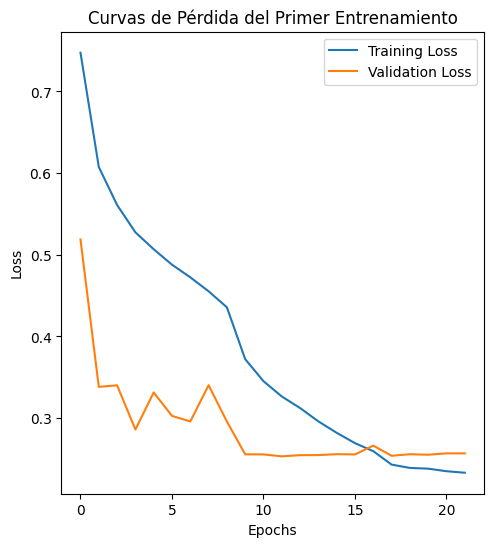

In [18]:
loss = history.history['loss']
val = history.history['val_loss']
# Crear el gráfico para el primer entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val, label='Validation Loss')
plt.title('Curvas de Pérdida del Primer Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()


In [19]:

model.save("elprimeroqueva.h5")

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2024-04-30 16:47:44.241216: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


28/28 [==============================] - 18s 177ms/step


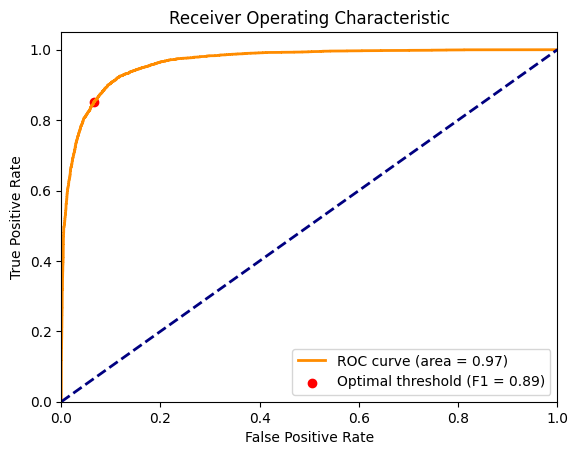

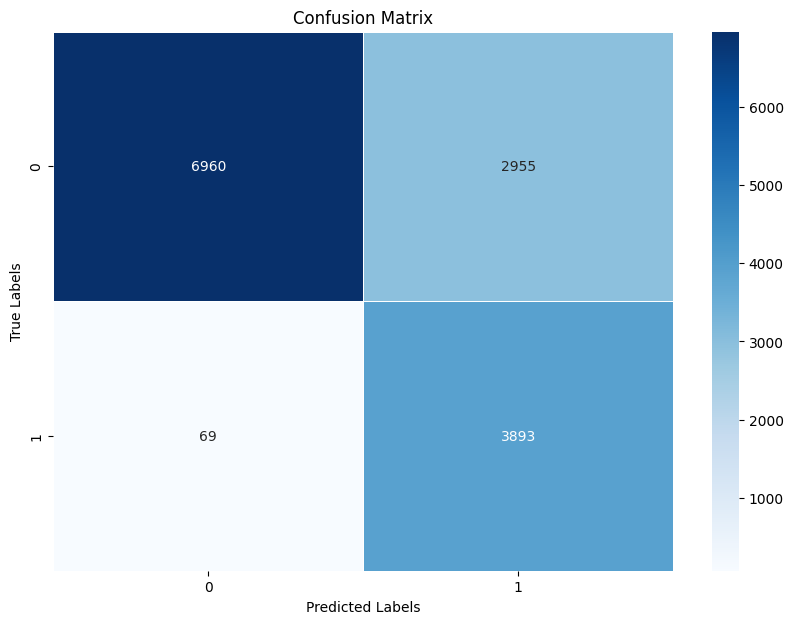

Umbral óptimo para maximizar el F1 Score Macro: 0.8046313
F1 Score Macro máximo: 0.8906830249722051


In [20]:
from tensorflow.keras.models import load_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

try:
    # Asumiendo que 'model' y 'test_dataset' ya están definidos y cargados
    predictions = model.predict(test_dataset)
    predicted_classes = (predictions > 0.05).astype(int)

    true_classes = np.concatenate([y for x, y in test_dataset], axis=0)

    cm = confusion_matrix(true_classes, predicted_classes)

    fpr, tpr, thresholds = roc_curve(true_classes, predictions)
    roc_auc = auc(fpr, tpr)

    # Calcular el F1 Score para cada posible umbral
    f1_scores = [f1_score(true_classes, predictions > thresh, average='macro') for thresh in thresholds]

    # Encontrar el índice del máximo F1 Score
    max_f1_index = np.argmax(f1_scores)
    max_f1 = f1_scores[max_f1_index]
    optimal_thresh = thresholds[max_f1_index]

    # Gráfico de la curva ROC
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.scatter(fpr[max_f1_index], tpr[max_f1_index], marker='o', color='red', label='Optimal threshold (F1 = %0.2f)' % max_f1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Visualización mejorada de la Matriz de Confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Mostrando el umbral óptimo y el F1 Score máximo
    print("Umbral óptimo para maximizar el F1 Score Macro:", optimal_thresh)
    print("F1 Score Macro máximo:", max_f1)

except Exception as e:
    print("Error:", e)


64/64 [==============================] - 12s 72ms/step


/tmp/ipykernel_14/3678671529.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df['Predicted_Status'] = (predictions.flatten() > 0.2).astype(int)


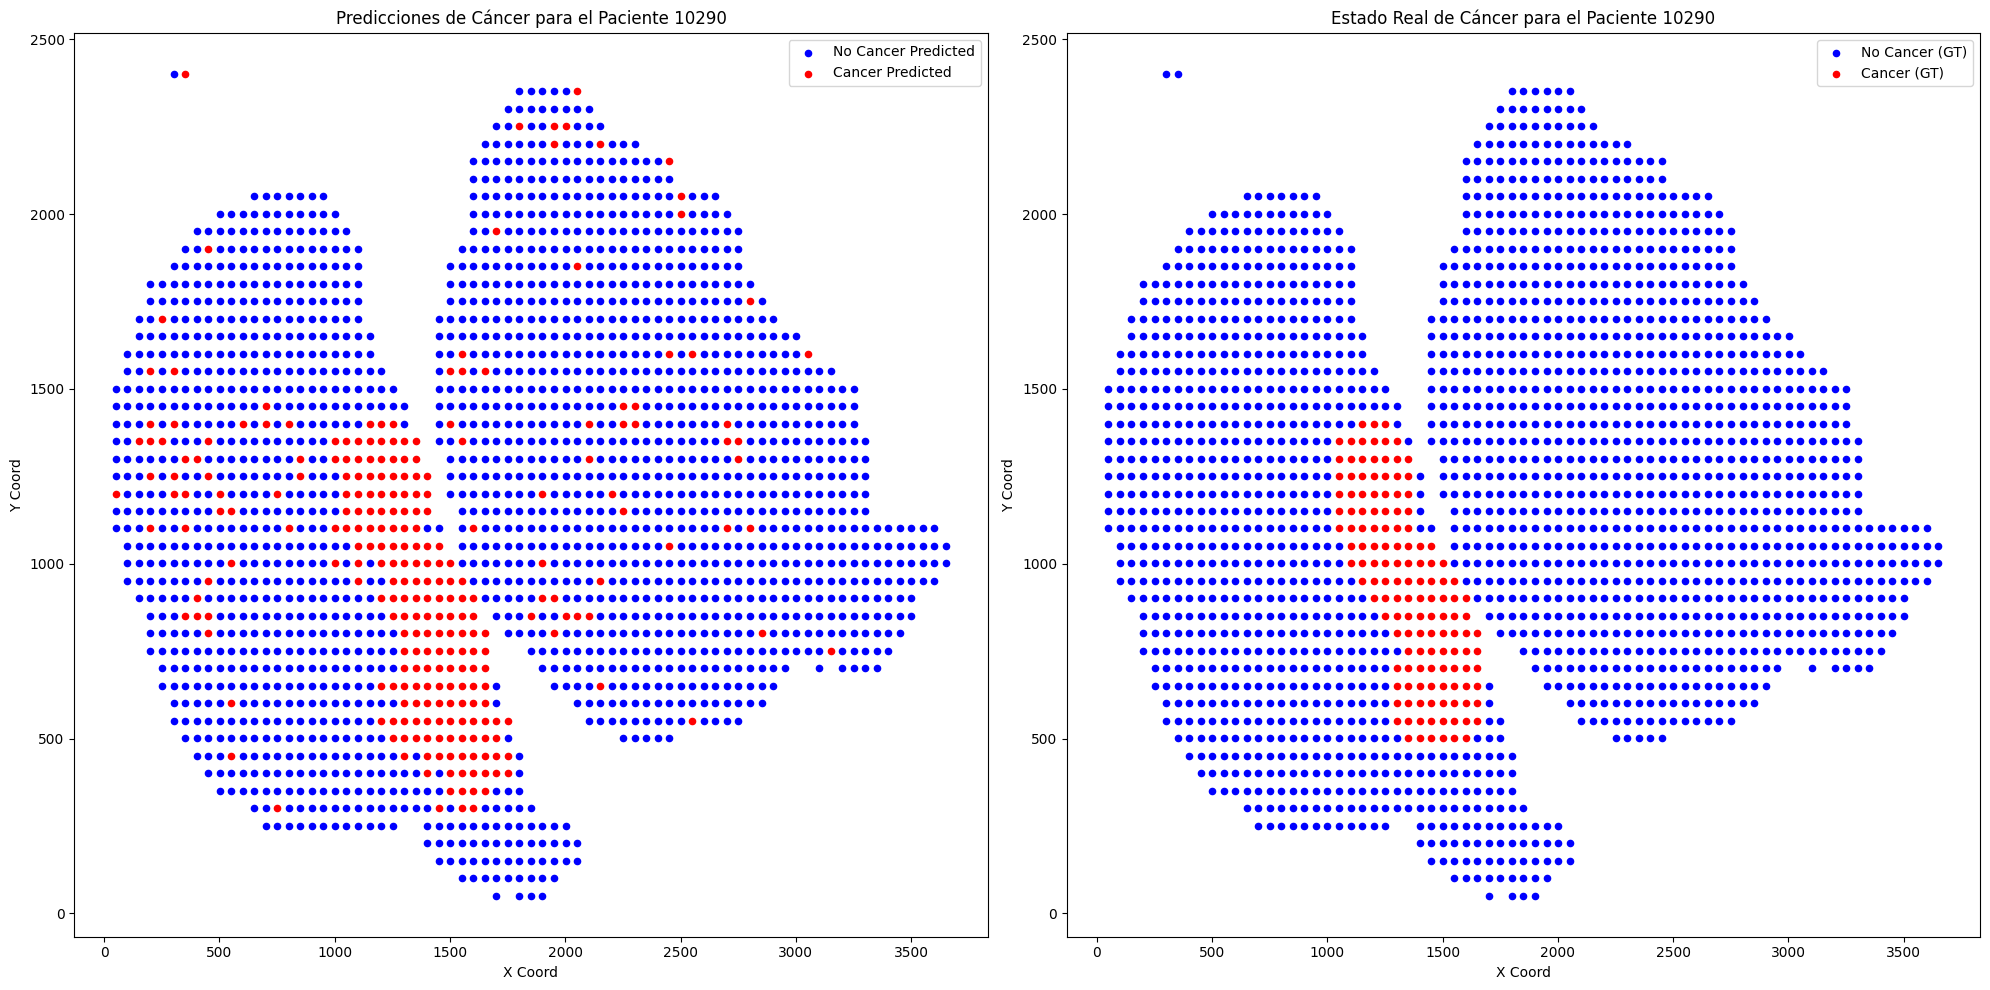

/tmp/ipykernel_14/3678671529.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df['Smoothed_Predicted_Status'] = smoothed_predictions


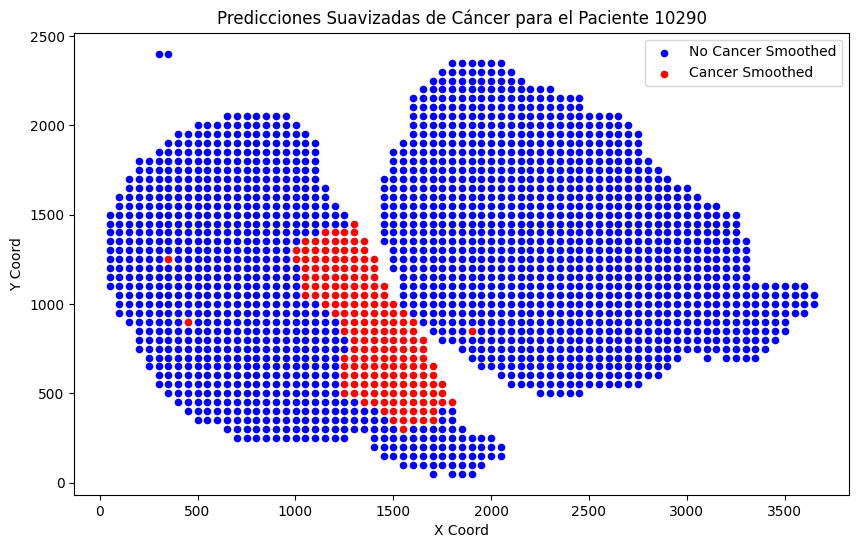

Accuracy: 0.97


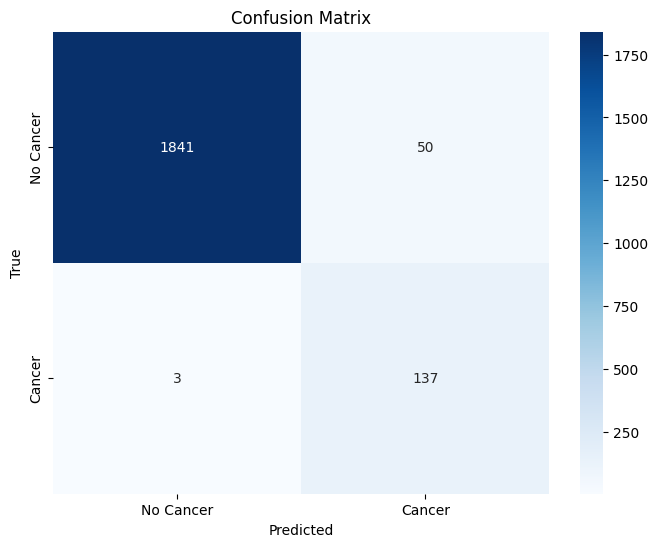

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import random

# Suponiendo que el modelo ya está definido y cargado como 'model'
# También asumimos que 'df' es el DataFrame creado previamente

# Función para cargar y preparar una imagen
def load_and_prepare_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return image

# Elegir un paciente al azar
random_patient_id = random.choice(df['Patient_Number'].unique())
patient_df = df[df['Patient_Number'] == random_patient_id]

# Preparar los datos para el modelo
images = np.array([load_and_prepare_image(fp).numpy() for fp in patient_df['File_Path']])
coords = patient_df[['X_Coord', 'Y_Coord']].values

# Predicciones del modelo
predictions = model.predict([images, coords])

# Añadir las predicciones al DataFrame del paciente
patient_df['Predicted_Status'] = (predictions.flatten() > 0.2).astype(int)

# Configurar la figura para visualizar subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Dos subplots en una fila

# Subplot para las predicciones del modelo
for status, color, label in zip([0, 1], ['blue', 'red'], ['No Cancer Predicted', 'Cancer Predicted']):
    subset = patient_df[patient_df['Predicted_Status'] == status]
    axs[0].scatter(subset['X_Coord'], subset['Y_Coord'], c=color, label=label, s=20)
axs[0].set_title(f"Predicciones de Cáncer para el Paciente {random_patient_id}")
axs[0].set_xlabel("X Coord")
axs[0].set_ylabel("Y Coord")
axs[0].legend()

# Subplot para el ground truth
for status, color, label in zip([0, 1], ['blue', 'red'], ['No Cancer (GT)', 'Cancer (GT)']):
    subset = patient_df[patient_df['Cancer_Status'] == status]
    axs[1].scatter(subset['X_Coord'], subset['Y_Coord'], c=color, label=label, s=20)
axs[1].set_title(f"Estado Real de Cáncer para el Paciente {random_patient_id}")
axs[1].set_xlabel("X Coord")
axs[1].set_ylabel("Y Coord")
axs[1].legend()

plt.tight_layout()
plt.show()
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Supongamos que 'patient_df' ya contiene las predicciones originales del paciente seleccionado

# Convertir las coordenadas y predicciones en un array de NumPy para el cálculo de vecinos
coords = patient_df[['X_Coord', 'Y_Coord']].values
predictions = patient_df['Predicted_Status'].values

# Usar NearestNeighbors para encontrar los 9 vecinos más cercanos para cada punto
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(coords)  # n_neighbors incluye el punto mismo
distances, indices = nbrs.kneighbors(coords)

# Calcular el nuevo valor predicho basado en el promedio de los valores de los vecinos
smoothed_predictions = []
for neighbor_indices in indices:
    # Excluir el propio punto del promedio, usando los vecinos[1:10]
    neighbor_preds = predictions[neighbor_indices[1:10]]
    mean_prediction = np.mean(neighbor_preds)
    # Binarizar el promedio para obtener un nuevo estado predicho, usando 0.5 como umbral
    new_pred = int(mean_prediction > 0.5)
    smoothed_predictions.append(new_pred)

# Añadir las nuevas predicciones al DataFrame
patient_df['Smoothed_Predicted_Status'] = smoothed_predictions

# Visualizar las nuevas predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for status, color, label in zip([0, 1], ['blue', 'red'], ['No Cancer Smoothed', 'Cancer Smoothed']):
    subset = patient_df[patient_df['Smoothed_Predicted_Status'] == status]
    plt.scatter(subset['X_Coord'], subset['Y_Coord'], c=color, label=label, s=20)
plt.title(f"Predicciones Suavizadas de Cáncer para el Paciente {random_patient_id}")
plt.xlabel("X Coord")
plt.ylabel("Y Coord")
plt.legend()
plt.show()


from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Asumimos que 'patient_df' ya tiene las columnas 'Cancer_Status' para el ground truth
# y 'Smoothed_Predicted_Status' para las predicciones suavizadas

# Calcular la accuracy
accuracy = accuracy_score(patient_df['Cancer_Status'], patient_df['Smoothed_Predicted_Status'])
print(f"Accuracy: {accuracy:.2f}")

# Crear la matriz de confusión
cm = confusion_matrix(patient_df['Cancer_Status'], patient_df['Smoothed_Predicted_Status'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
